# Group Five - Data Inspection Notebook

### Investigate Vector Data: the arctic_data_collection_sites geopackage

In [21]:
!ogrinfo --help

Usage: ogrinfo [--help-general] [-ro] [-q] [-where restricted_where|@filename]
               [-spat xmin ymin xmax ymax] [-geomfield field] [-fid fid]
               [-sql statement|@filename] [-dialect sql_dialect] [-al] [-rl] [-so] [-fields={YES/NO}]
               [-geom={YES/NO/SUMMARY}] [[-oo NAME=VALUE] ...]
               [-nomd] [-listmdd] [-mdd domain|`all`]*
               [-nocount] [-noextent] [-nogeomtype] [-wkt_format WKT1|WKT2|...]
               [-fielddomain name]
               datasource_name [layer [layer ...]]


In [17]:
!ogrinfo -so -al arctic_data_collection_sites.gpkg

INFO: Open of `arctic_data_collection_sites.gpkg'
      using driver `GPKG' successful.
Metadata:
  TITLE=WFS

Layer name: public_Arctic_Data_Collection_Sites:Sites
Metadata:
  TITLE=Sites
Geometry: Point
Feature Count: 13880
Extent: (-5079198.597576, -5692650.274471) - (5551747.058708, 5621232.906434)
Layer SRS WKT:
PROJCRS["WGS 84 / North Pole LAEA Alaska",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Gree

In [53]:
import geopandas as gpd

gdf = gpd.read_file("/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-five/arctic_data_collection_sites.gpkg")

<AxesSubplot: >

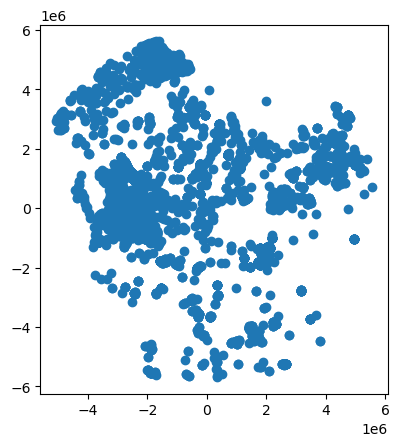

In [55]:
gdf.plot()

### Investigating Raster data: the Sermilik Fjord netcdf

In [13]:
from pathlib import Path
import xarray as xra

datafile_path = Path('/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-five/sermilik_fjord_data/data/SF2021ctd.nc')
ds = xra.open_dataset(datafile_path)
ds

<xarray.Dataset>
Dimensions:  (profile: 27, z: 901)
Coordinates:
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 23.0 24.0 25.0 26.0 27.0
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 ... 896.0 897.0 898.0 899.0 900.0
Data variables:
    time     (profile) datetime64[ns] ...
    lat      (profile) float64 ...
    lon      (profile) float64 ...
    sal      (z, profile) float64 ...
    temp     (z, profile) float64 ...
    oxy      (z, profile) float64 ...
    turb     (z, profile) float64 ...
Attributes: (12/26)
    time_coverage_start:             2021-08-12T13:13:24Z
    time_coverage_end:               2021-08-18T19:34:53Z
    geospatial_lat_min:              65.462067
    geospatial_lat_max:              66.176317
    geospatial_lat_units:            degrees_north
    geospatial_lon_min:              -38.34985
    ...                              ...
    instrument:                      Seabird SBE25plus #0251108 and RBR Conce...
    product_version:                 v1
    processing_level:                Quality Controlled
    summary:                         27 Temperature, salinity, dissolved oxyg...
    acknowledgement:                 Funding from Heising-Simons Foundation
    title:                           Temperature, salinity, dissolved oxygen,...

Let's drill into one of the data layers in the netcdf file, looking first at the `temp` array, which shows temperature measurements. We can see that it is a `DataArray` type, which is an xarray datatype.

In [37]:
print(type(ds.temp))

<class 'xarray.core.dataarray.DataArray'>


We can see from the metadata printed above (and we can investigate further in the cell below) that the data coordinates (the x and y dimensions) are `profile` which is the location of the sensor for a certain data collection and `z` which is the depth of the sensor in meters for that profile.

In [40]:
print(ds.temp.coords)

Coordinates:
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 23.0 24.0 25.0 26.0 27.0
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 ... 896.0 897.0 898.0 899.0 900.0


Let's look directly at the values in the array

In [49]:
ds.temp.values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [5.3216    , 1.79725455, 2.65305152, ..., 5.14097917, 4.4952069 ,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

That isn't particularly useful aside from noticing a lot of `null` values, but we can get a sense of how the data is organized. To better understand what is going on, we can visualize the data with the built in xarray method `.plot()` that uses the `matplotlib.pyplot` module to visualize `DataArray` type objects.

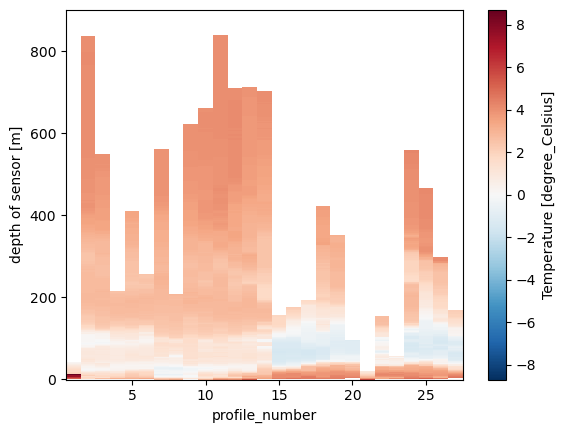

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

ds.temp.plot()